### Final Project Machine Learning for Public Health 
May 23rd 2024

Manvi Sharma

### Project Description:

The dataset used for this project is the "Diabetes 130-US hospitals for years 1999-2008" from the UCI Machine Learning Repository. This dataset represents 10 years (1999-2008) of clinical care data from 130 US hospitals and integrated delivery networks. Each record corresponds to a hospital admission of a patient diagnosed with diabetes, including information about laboratory tests, medications, and patient demographics. 
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

The goal of my project is to determine the early readmission of the patient within 30 days of discharge. I want to develop a machine learning model to predict the early readmission of patients diagnosed with diabetes, based on their hospital records. Early readmission is a critical factor in healthcare management and patient care quality. By accurately predicting which patients are at risk of early readmission, hospitals can implement targeted interventions to improve patient outcomes and reduce overall healthcare costs.

In [36]:
#Final Project:

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, classification_report

df = pd.read_csv('diabetic_data.csv')

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Preprocessing

In [37]:
df = df.replace("?",np.nan) #replace ? with NaN

df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [38]:
df.info()
#To find how many null columns there are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [39]:
df.isnull().sum()[df.isnull().sum()>1]/len(df) 
#To find the ratio of null values for all listed features that have null values - to see which columns to drop

race                 0.022336
weight               0.968585
payer_code           0.395574
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
dtype: float64

In [40]:
df.drop(['weight','max_glu_serum','A1Cresult'],axis=1,inplace=True) #delete top 3

In [41]:
df['readmitted'].value_counts()
#Want to look into the early readmitted patients = readmitted within 30 days

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [42]:
df['readmitted'] = df['readmitted'].replace({"NO":0, "<30":1, ">30":0})
df['readmitted'].value_counts()

# Since my goal is to determine the early readmissions of patients (within 30 days) anything more than 30 days is 0

0    90409
1    11357
Name: readmitted, dtype: int64

Processing of the data:

To process the UCI dataset for this project, I started by loading the dataset and replacing placeholder values ('?') with NaN to handle missing data effectively. Then I inspected the dataset to understand its structure and identified columns with a high proportion of missing values, which then I decided to subsequently drop in order to improve the data quality. 

Next, the target variable 'readmitted' was encoded into binary format to simplify the classification task and align it with the project's goal of predicting early readmissions.

'NO' and '>30' were set to 0, and '<30' was set to 1, focusing on early readmissions within 30 days. 

Categorical features were transformed into numerical representations using Label Encoding and OneHotEncoding to make them suitable for machine learning algorithms. We also scaled numerical features using StandardScaler to ensure all features contributed equally to the model. Through correlation analysis, we identified and selected features with significant relationships to the target variable for inclusion in the model, ensuring that only the most relevant information was used in the prediction process.

Sources used/referenced:
https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas


### Feature Selection

In [25]:
X = df.drop(columns=['readmitted'])
y = df['readmitted']

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
scaler = StandardScaler()
le = LabelEncoder()


for i in categorical_features:
  X[i] = le.fit_transform(X[i])

In [26]:
X

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,2,0,0,6,25,1,1,17,...,0,0,1,1,0,0,0,0,1,0
1,149190,55629189,2,0,1,1,1,7,3,17,...,0,0,3,1,0,0,0,0,0,1
2,64410,86047875,0,0,2,1,1,7,2,17,...,0,0,1,1,0,0,0,0,1,1
3,500364,82442376,2,1,3,1,1,7,2,17,...,0,0,3,1,0,0,0,0,0,1
4,16680,42519267,2,1,4,1,1,7,1,17,...,0,0,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0,1,7,1,3,7,3,7,...,0,0,0,1,0,0,0,0,0,1
101762,443847782,74694222,0,0,8,1,4,5,5,7,...,0,0,2,1,0,0,0,0,1,1
101763,443854148,41088789,2,1,7,1,1,7,1,7,...,0,0,0,1,0,0,0,0,0,1
101764,443857166,31693671,2,0,8,2,3,7,10,7,...,0,0,3,1,0,0,0,0,0,1


During the feature selection steps, categorical features were transformed into numerical representations using Label Encoding to make them suitable for machine learning algorithms. I also scaled numerical features using StandardScaler to ensure all features contributed equally to the model preventing features with larger scales from dominating the learning process.

Sources used/referenced:
https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

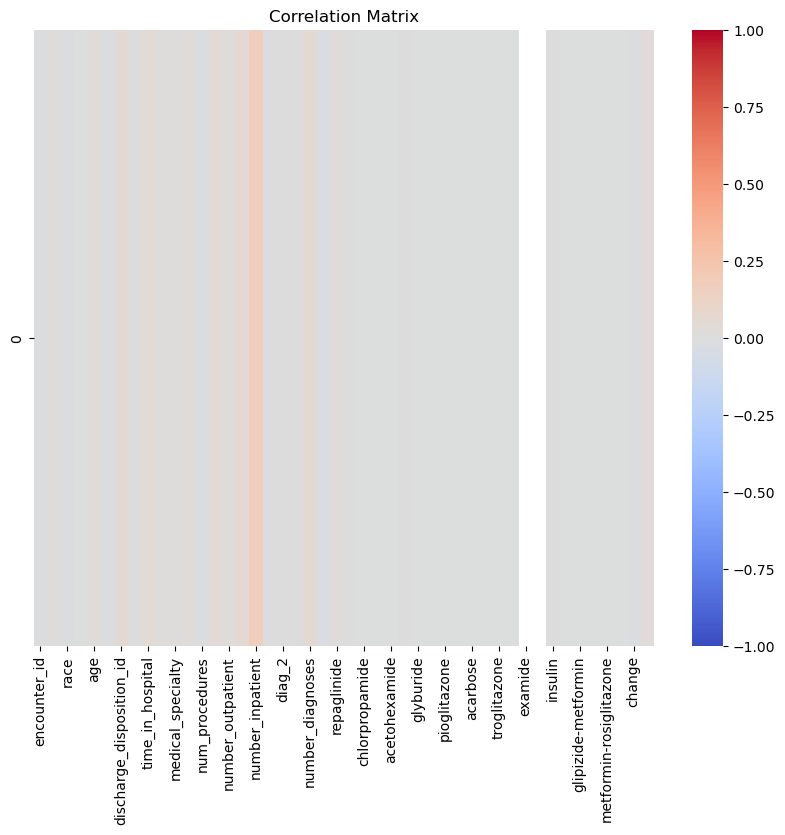

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = pd.DataFrame(X).corrwith(y)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame().T, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [44]:
correlation_matrix[abs(correlation_matrix) > 0.05]

discharge_disposition_id    0.050560
number_emergency            0.060747
number_inpatient            0.165147
dtype: float64

In [45]:
# Correlation Analysis for Feature Selection
# correlation_matrix = pd.DataFrame(X).corrwith(y)
selected_features = correlation_matrix[abs(correlation_matrix) > 0.05].index  
X_selected = X[selected_features]

In [46]:
X_selected

,discharge_disposition_id,number_emergency,number_inpatient
0,25,0,0
1,1,0,0
2,1,0,1
3,1,0,0
4,1,0,0
...,...,...,...
101761,3,0,0
101762,4,0,1
101763,1,0,0
101764,3,0,1


Performing correlation analysis as part of the feature selection process:

The heatmap color-codes the correlations between each feature in the dataset X and the target variable- making it easier to identify patterns and relationships. Features with positive correlation values closer to 1 indicate a strong positive relationship with the target variable and are more red on this heatmap. 

The correlation coefficient for discharge_disposition_id is approximately 0.051, and for number_emergency is approximately 0.061. They both indicate a weak correlation with the target variable (readmission within 30 days) being close to 0. 

The correlation coefficient for number_inpatient is approximately 0.165, suggesting a moderate positive correlation with the target variable.

### Model Preperation Steps

In [47]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Random Forest Regressor model
rf = RandomForestRegressor()
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(1, 100, num=10)] + [None]
}


model = RandomForestRegressor(n_estimators=100)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_selected, y)


best_params = grid_search.best_params_

print("Best estimators were:", best_params)


regressor = RandomForestRegressor(n_estimators=100, max_features=best_params['max_features'], max_depth = best_params['max_depth'])

y_pred = cross_val_predict(regressor, X_selected, y, cv=5, method='predict')


# Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Best estimators were: {'max_depth': 12, 'max_features': 'log2'}
Mean Squared Error (MSE): 0.10


The following steps were taken to ensure that my model is optimized and reliable for predicting outcomes based on the selected features.

To be able to tune the model, GridSearchCV helped find the optimal hyperparameters for the Random Forest Regressor, enhancing the model's predictive ability.
I used cross_val_predict to perform cross-validation to assess the model's generalized performance and minimize overfitting.
The MSE helps quantify the average squared difference between predicted and actual values, providing insight into the model's accuracy. A low MSE of 0.10 indicates that the model has good predictive performance and effectively captures the underlying patterns in the data.
Overall, the model's predictions are quite close to the actual values.

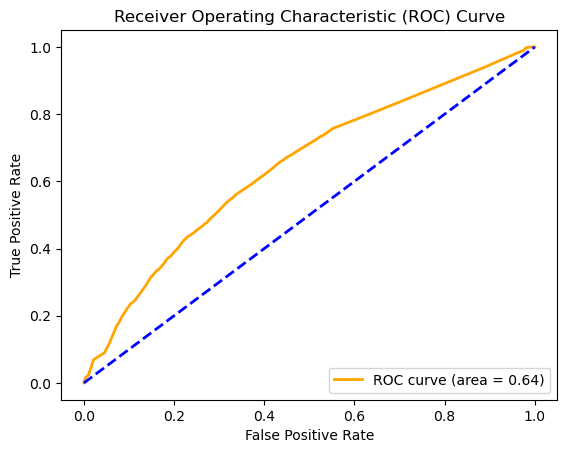

In [49]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



I chose to do correlation analysis for the feature selection, with alpha = 0.05 and selected the 3 features outlined above for the model. For the RandomForestRegressor parameter tuning, I used the same approach as previous homeworks, where I used tuned mtry and nodesize. The 3 features selected = discharge_disposition_id, number_emergency, number_inpatient

mtry in R is equal to max_features in Python and nodesize in R equal to min_samples_leaf in Python. But the maximum number of nodes (maxnodes) in Python does not have a direct equivalent parameter, instead the tree's complexity and depth can be controlled using the max_depth parameter. 

I also selected the parameters above by using cross validation. The max depth used was = 12 because that was the best parameter value I got after performing 5 fold cross validation. The max feature or mtry is the number of features to sample at each node. In python this can be {“sqrt”, “log2”, None}, int or float. I chose to do 5 fold cross validation for {“sqrt”, “log2”, None} and got log2 as the best value. 

For model evaluation, I utilized cross-validation to predict probabilities and also constructed an ROC curve. The area under the ROC curve is calculated = 0.64, this suggests that the model performs better than random guessing in distinguishing between early readmission and non-early readmission cases. 

### Conclusion: Predicting Early Readmission in Diabetes Patients

This project aimed to develop a model for predicting early readmission of diabetes patients based on clinical data from 130 US hospitals over the 10 year period. The analysis involved feature selection, model parameter tuning, and performance evaluation.

The implementation and further usage for this model:
The trained RandomForestRegressor model, with the identified optimal hyperparameters, can maybe be deployed in an environment to handle actual data and perform real-time predictions.
This could be integrated into healthcare systems to provide real-time predictions of early readmission risk for diabetes patients upon discharge from hospitals.
Furthermore, Healthcare providers can use these predictions to proactively identify the patients at high-risk of readmission and tailor post-discharge care plans to reduce the readmission rates and improve patient outcomes.

In conclusion, this project tries to demonstrate how potentially use of ML models can assist healthcare providers in predicting and managing early readmission risks among patients. Through utilizing clinical data and advanced analytics, we can move towards more personalized and effective healthcare interventions.